<a href="https://colab.research.google.com/github/heejvely/Deep_learning/blob/main/%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 퍼셉트론

퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력합니다.

여기서 말하는 신호란 전류나 강물처럼 흐름이 있는 것이고, 전류가 전선을 타고 흐르는 전자를 내보내듯 퍼셉트론 신호도 흐름을 만들고 정보를 앞으로 전달합니다.

다만, 실제 전류와 달리 퍼셉트론 신호는 '흐른다/안 흐른다(1이나 0)'의 두 가지 값을 가질 수 있습니다.

### [퍼셉트론의 예]

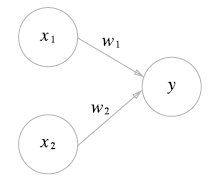

- x₁과 x₂는 입력 신호, y는 출력 신호, w₁과 w₂는 가중치를 뜻합니다.
- 그림의 원을 뉴런 혹은 노드라고 부릅니다.
- 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해집니다.
- 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력합니다.(이를 '뉴런이 활성화한다'라 표현하기도 합니다.)
- 그 한계를 임계값이라 하며, θ기호 로 나타냅니다.

## 퍼셉트론 구현하기

In [2]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

print(AND(0, 0)) # 0을 출력
print(AND(1, 0)) # 0을 출력
print(AND(0, 1)) # 0을 출력
print(AND(1, 1)) # 1을 출력

0
0
0
1


## 가중치와 편향 도입

θ를 -b로 치환하면 퍼셉트론 동작이 아래 식처럼 됩니다.

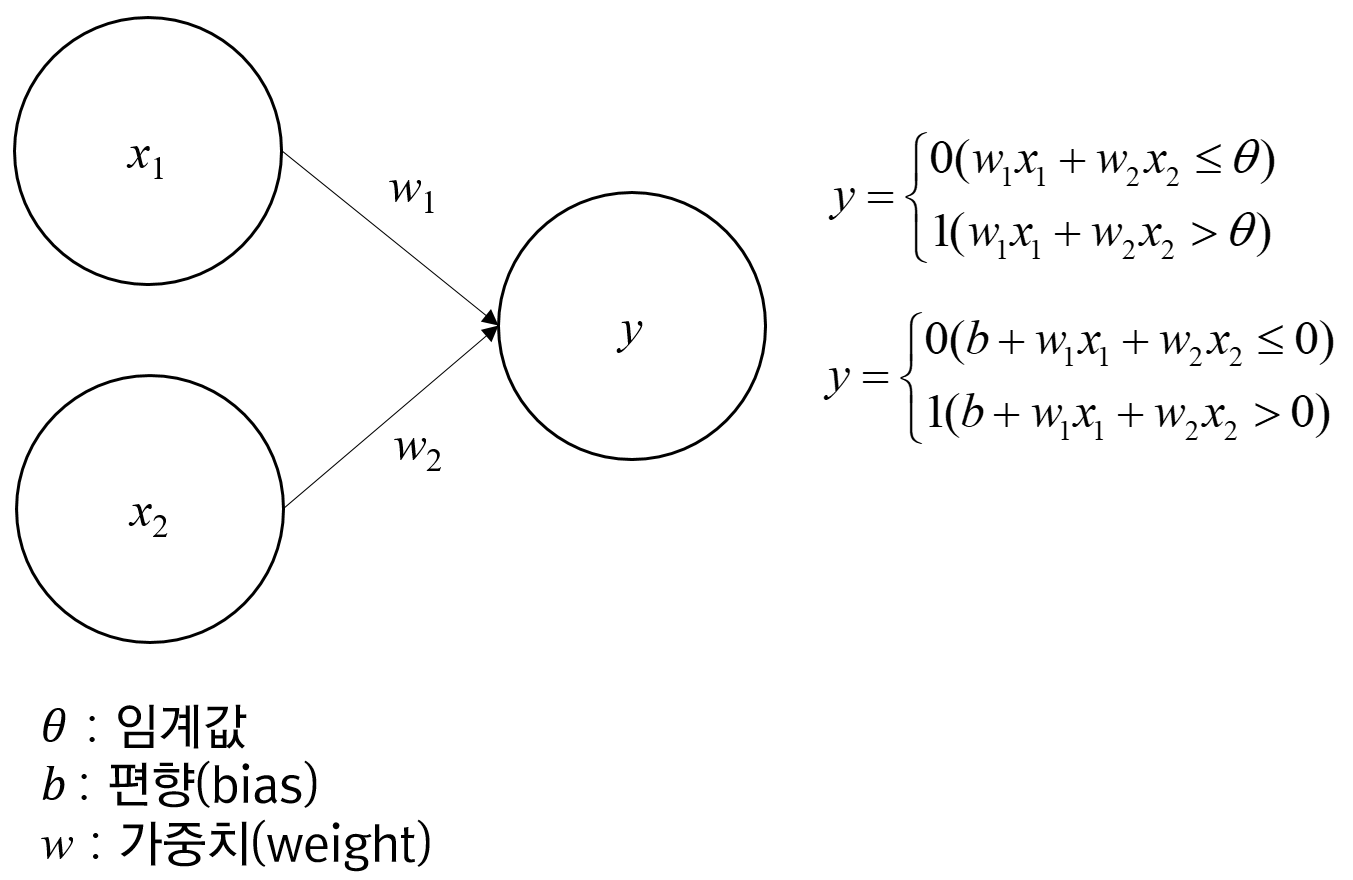

위 식과 아래 식은 기호 표기만 바꿨을 뿐, 그 의미는 같습니다. 여기에서 b를 편향이라 하며 w₁과 w₂는 그대로 가중치입니다.

In [3]:
import numpy as np

x = np.array([0,1])       # 입력
w = np.array([0.5,0.5])   # 가중치
b = -0.7                  # 편향

print(w*x)                # 배열 곱셈
print(np.sum(w*x))        # 배열에 담긴 모든 원소의 총합 계산
print(np.sum(w*x) + b)    # 대략 -0.2 (부동소수점 수에 의한 연산 오차)

[0.  0.5]
0.5
-0.19999999999999996


#### 가중치와 편향 구하기
'가중치와 편향을 도입'한 AND 게이트는 다음과 같이 구현할 수 있습니다.

- theta가 -b로 치환
- 편향은 가중치 w1,w2와 기능이 다름.
  - w1과 w2는 각 입력 신호가 결과에 주는 영향력(중요도)를 조절하는 매개변수고, 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조절하는 매개변수

In [4]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

print(AND(0, 0)) # 0을 출력
print(AND(1, 0)) # 0을 출력
print(AND(0, 1)) # 0을 출력
print(AND(1, 1)) # 1을 출력

0
0
0
1


In [6]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])    # AND와는 가중치(w와 b)만 다르다
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

print('#NAND')
print(NAND(0, 0)) # 1을 출력
print(NAND(1, 0)) # 1을 출력
print(NAND(0, 1)) # 1을 출력
print(NAND(1, 1)) # 0을 출력
print()

print('#OR')
print(OR(0, 0)) # 0을 출력
print(OR(1, 0)) # 1을 출력
print(OR(0, 1)) # 1을 출력
print(OR(1, 1)) # 1을 출력

#NAND
1
1
1
0

#OR
0
1
1
1


### 다층 퍼셉트론

XOR 문제는 기존 퍼셉트론으로는 풀 수 없음. 퍼셉트론을 여러 층 쌓은 다층 퍼셉트론으로 풀어야 함.

In [7]:
# XOR 게이트 구현

def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

print(XOR(0, 0)) # 0을 출력
print(XOR(1, 0)) # 1을 출력
print(XOR(0, 1)) # 1을 출력
print(XOR(1, 1)) # 0을 출력

0
1
1
0


#### XOR의 퍼셉트론

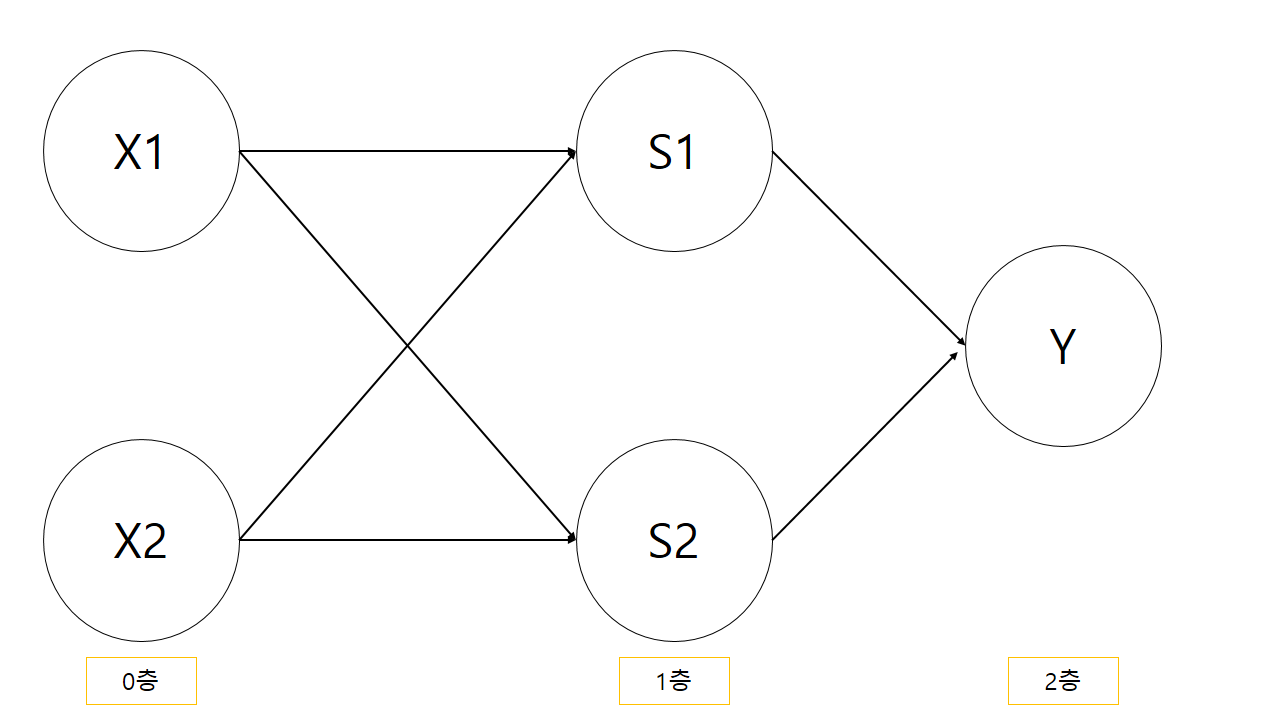

1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보낸다.
2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력한다.


- AND, OR가 단층 퍼셉트론인 데 반해, XOR은 2층 퍼셉트론
- 이처럼 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라고 함.

# 정리

- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 그 값을 출력한다.
- 퍼셉트론에서는 '가중치'와 '편향'을 매채변수로 설정한다.
- 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
- 2츨 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.